### Jupyter Notebook for *IBM Statistics for Data Science with Python* Course

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [33]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print(boston_df.head())
print(boston_df.shape)

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
(506, 14)


In [34]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [35]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


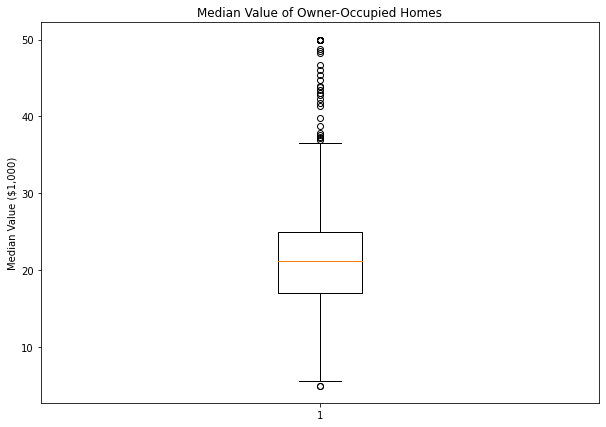

In [36]:
# Task 4: Plot 1 - For the "Median value of owner-occupied homes" provide a boxplot.

med_value = boston_df["MEDV"]

fig = plt.figure(figsize =(10, 7))
plt.ylabel("Median Value ($1,000)")
plt.title("Median Value of Owner-Occupied Homes")
plt.boxplot(med_value)
plt.show()

# Looking at the statistics for median house values, the median value is ~$21,200 with a standard deviation of ~$9,200.  The first and third quartiles
# are ~$17,000 and $25,000, respectively.  The max and min values are ~$50,000 and $5,000, respectively.  These values are all summarized in the 
# boxplot below for convenience.

35 houses bound the Charles River and 471  houses do not bound the Charles River.


Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

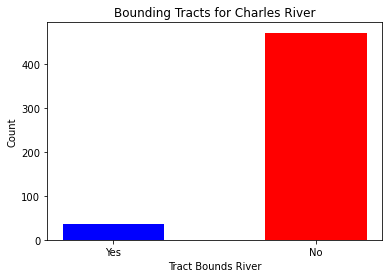

In [52]:
# Task 4: Plot 2 - Provide a bar plot for the Charles River variable.

CR1 = boston_df['CHAS'].value_counts()[1]
CR0 = boston_df['CHAS'].value_counts()[0]

x = np.array(["Yes", "No"])
y = np.array([CR1, CR0])

plt.bar(x,y, width = 0.5, color=("blue", "red")) 
plt.xlabel('Tract Bounds River')
plt.ylabel('Count')
plt.title('Bounding Tracts for Charles River')

print(CR1, "houses bound the Charles River and", CR0, " houses do not bound the Charles River.")
# The number of tracks that do and don't bound the Charles River is 35 and 471, respectively.  These values are shown in the bar
# chart below.
 

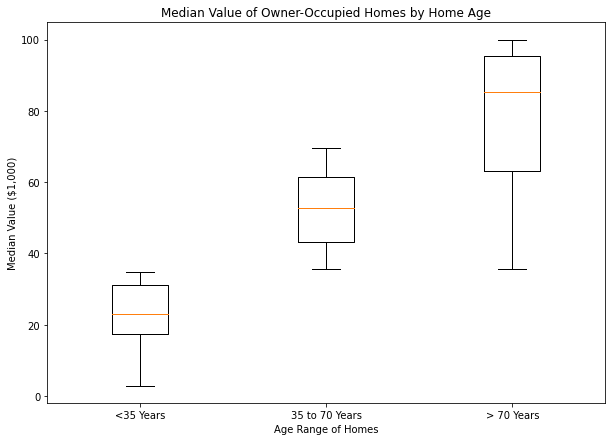

In [38]:
# Task 4: Plot 3 - Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, 
# between 35 and 70 yeprs and 70 years and older)

# Discretize into the 3 specified age groups.
thirtyfive_younger = boston_df[boston_df.AGE <= 35]["AGE"]
thirtyfive_seventy = boston_df[(boston_df.AGE > 35) & (boston_df.AGE < 70)]["AGE"]
seventy_older = boston_df[boston_df.AGE >= 35]["AGE"]
boxplot_data = [thirtyfive_younger, thirtyfive_seventy, seventy_older]
#print(thirtyfive_seventy.shape)

fig = plt.figure(figsize =(10, 7))
plt.xlabel("Age Range of Homes")
plt.ylabel("Median Value ($1,000)")
plt.title("Median Value of Owner-Occupied Homes by Home Age")
plt.boxplot(boxplot_data, labels=['<35 Years', '35 to 70 Years', '> 70 Years'])
plt.show()

# The chart below shows boxplots of median house values separated by house age.  As shown in this plot, the median house
# value increases significantly with house age.

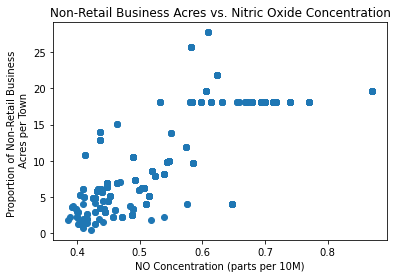

In [39]:
# Task 4: Plot 4 - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

x = np.array([boston_df["NOX"]])
y = np.array([boston_df["INDUS"]])

plt.xlabel("NO Concentration (parts per 10M)")
plt.ylabel("Proportion of Non-Retail Business \n Acres per Town")
plt.title("Non-Retail Business Acres vs. Nitric Oxide Concentration")
plt.scatter(x,y)

# As shown in the scatter plot below, there appears to be a direct correlation between the Nitric Oxide concentration and the
# proportion of non-retail business acres per town.

Text(0, 0.5, 'Count')

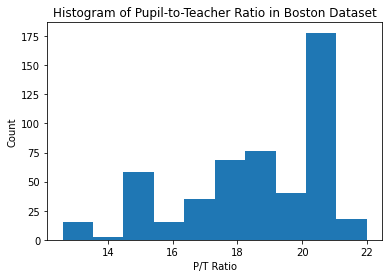

In [42]:
# Task 4: Plot 5 - Create a histogram for the pupil to teacher ratio variable.

plt.hist(boston_df['PTRATIO'])
plt.title("Histogram of Pupil-to-Teacher Ratio in Boston Dataset")
plt.xlabel("P/T Ratio")
plt.ylabel("Count")

# 21 is the most common pupil-to-teacher ratio by far.  The mean value is ~18.5 and that seems reasonable based on the histogram.

In [103]:
# Task 5 - Is there a significant difference in median value of houses bounded by the Charles Rvier or not?  (T-test for
# independent samples)

# Null Hypotheses - There is no significant difference in median values of houses that are and are not bounded by the Charles
# River.

# Apply t-test from scipy.stats (alpha = 0.05).
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] > 0.5]['MEDV'],
                   boston_df[boston_df['CHAS'] < 0.5]['MEDV'], equal_var = True)

# The resulting p-value is ~0.0000739 << 0.05.  Therefore, we reject the null hypothesis and conclude that there is a 
# statisitical difference in median housing value based on whether the houses are bound by the Charles River. 

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [104]:
# Task 5: Question 2 - Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units built prior 
# to 1940 (AGE)? (ANOVA)

# Null Hypothesis - There is no significant difference in median values of houses built before and after 1940.

# Sort the data for the medain value of houses built before and after 1940.  Since it is 2022, houses older than ~82 years
# were built before 1940.
house_age_older_medv = boston_df[boston_df["AGE"] > 82]["MEDV"]
house_age_younger_medv = boston_df[boston_df["AGE"] < 82]["MEDV"]

# Use ANOVA to compare the median value of houses built before and after 1940 (alpha = 0.05).
f_statistic, p_value = scipy.stats.f_oneway(house_age_older_medv, house_age_younger_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Since the p-value is ~9.75e-16 << 0.05, we reject the null hypotheses and conclude that there is a significant difference
# in median values of houses built before and after 1940.

F_Statistic: 68.86692634803022, P-Value: 9.753787924390255e-16


In [105]:
# Task 5: Question 2 - Is there a difference in median values of houses (MEDV) for each proportion of owner occupied units built 
# prior to 1940 (AGE)? (ANOVA)

# Null Hypothesis - There is no significant difference in median values of houses for each proportion of owner occupied units
# built prior to 1940.

# Use ANOVA to compare the median value of houses built before and after 1940 (alpha = 0.05).
proportion_older_houses = boston_df["AGE"]
house_medv = boston_df["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(house_medv, proportion_older_houses)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Since the p-value is << 0.05, we reject the null hypotheses and conclude that there is a significant difference
# in median values of houses for each proportion of houses built prior to 1940.

F_Statistic: 1223.1740271875933, P-Value: 3.20946197250671e-176


In [106]:
# Task 5: Question 3 - Can we conclude that there is no relationship between Nitric oxide concentrations and 
# proportion of non-retail business acres per town? (Pearson Correlation)

# Null Hypotheses - There is no correlation between Nitric Oxide concentrations and the proportion of non-retail business
# acres per town.

# Perform a Pearson Correlation Test on the data (alpha = 0.05).
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Since the p-value is ~7.9e-98 << 0.05, we reject the null hpyotheses and conclude that there is a correlation between 
# Nitric Oxide concentrations and the proportion of non-retail business acres per town.  The correlation coefficient of 
# ~0.764 indicates a strong positive linear correlation and this is supported by the scatter plot generated in Task 4 above.

(0.7636514469209149, 7.913361061240043e-98)

In [92]:
# Task 5: Question 4 - What is the impact of an additional weighted distance to the five Boston employment centres (DIS)
# on the median value of owner occupied homes (MEDV? (Regression analysis)

# Null Hypothesis - There is no impact of an additional weighted distance to the five Boston employment centres on the
# median value of owner occupied homes.

# Perform a regression analysis using the statsmodels.api module (alpha = 0.05).
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# Since the resulting p-value ~1.21e-8 << 0.05, we reject the null hypotheses and conclude that the impact of an additional
# weighted distance to the five Boston employment centres on teh median value of owner occupied homes is significant.

C:\Users\gbran\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        11:11:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""